In [19]:
from pathlib import Path
import lasio
import matplotlib.pyplot as plt
import csv
import numpy as np

## Loading all LAS files in Data\LASs
### counting total number of LAS files
### Extract first 10 well logs headers, as save as a txt for Shelle

In [2]:
input_path = "Data\\LASs"
prefix = "*.las"
files = sorted(Path(input_path).glob(prefix))
#print(files)
total_files = 0
list_of_LAS_files = []
for fp in files:
    #print(fp.resolve())
    list_of_LAS_files.append(str(fp.resolve()))
    total_files += 1
print(f"Total {total_files} LAS files in {input_path}")

Total 29 LAS files in Data\LASs


In [52]:
# Pick a log file, n = 0 -- 28"
n = 2
las_file = list_of_LAS_files[n]
print(las_file)
las =  lasio.read(las_file)
well_info = las.well.dictview()
curves = las.curves
params =  las.params
print("\n")
print(f"Available curves in {well_info["WELL"]}")
print(curves)

C:\Users\Chuen-Song.Chen\Log-nificent-Minds\Data\LASs\MBRNE-12H1_RDL_XUT.las


Available curves in MBRNE-12H1
Mnemonic  Unit      Value  Description                 
--------  ----      -----  -----------                 
MD        m                {F}                         
BADHOLE   UNITLESS         BADHOLE flag {F}            
BS        in               {F}                         
CALI      in               {F}                         
DEN       g/cm3            {F}                         
DENC      g/cm3            {F}                         
DT        us/ft            {F}                         
DT_SHEAR  us/ft            {F}                         
GR        GAPI             {F}                         
GR_N      gAPI             {F}                         
NETFLAG   unitless         Sand flag {F}               
NEU       v/v              {F}                         
PE        b/e              {F}                         
PERM      mD               Base Case Permeability 

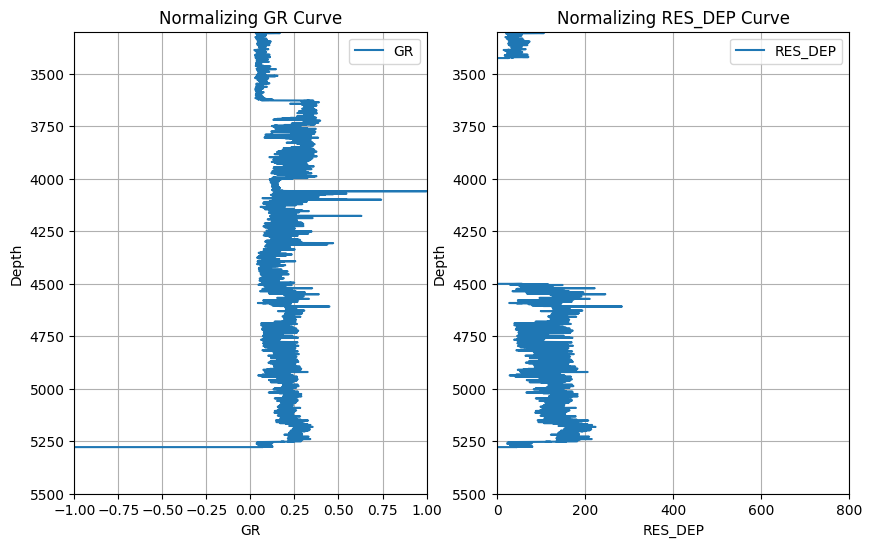

In [57]:
# Extract the specific curve data (e.g., 'GR' for Gamma Ray)
curve_name = "GR"  # Replace 'GR' with the name of the curve you want to plot
curve_name2 = "RES_DEP"
depth = las['MD'] 
curve_data = las[curve_name]
curve_data2 = las[curve_name2]

# Data cleaning for NaN 
curve_data = np.where(np.isnan(curve_data), -9999, curve_data)
curve_data2 = np.where(np.isnan(curve_data2), -9999, curve_data)
#normalizing curve by its maximum values
curve_data = curve_data/np.max(curve_data)
curve_data2 = curve_data2 #/np.max(curve_data2)

# Plot the specific curve
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(curve_data, depth, label=curve_name)
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.title(f'Normalizing {curve_name} Curve')
plt.xlabel(curve_name)
plt.ylabel('Depth')
plt.xlim(-1.0,1.0)
plt.ylim(5500,3300)
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(curve_data2, depth, label=curve_name2)
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.title(f'Normalizing {curve_name2} Curve')
plt.xlabel(curve_name2)
plt.ylabel('Depth')
plt.xlim(-1.0,800.0)
plt.ylim(5500,3300)
plt.legend()
plt.grid()
plt.savefig('temp\\well_curves3.png', dpi=300, transparent=True)
plt.show()

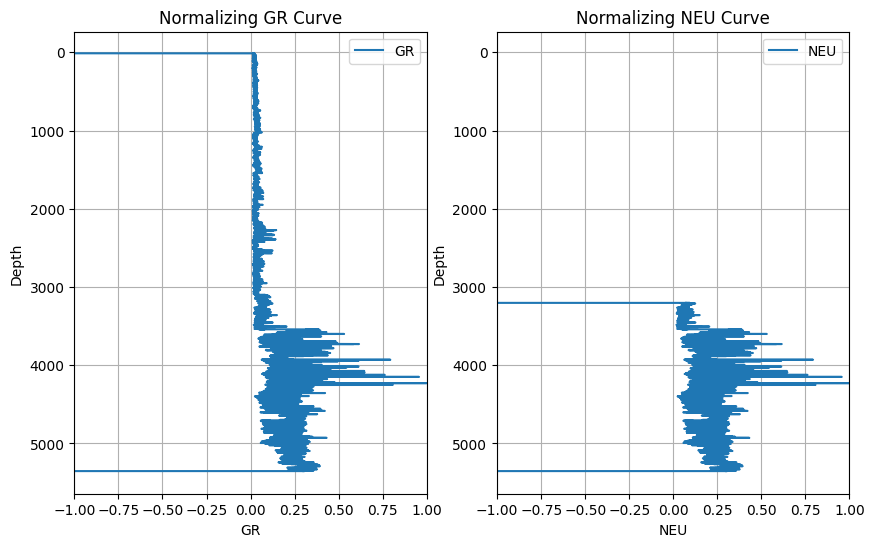

In [35]:
# Extract the specific curve data (e.g., 'GR' for Gamma Ray)
curve_name = "GR"  # Replace 'GR' with the name of the curve you want to plot
curve_name2 = "NEU"
depth = las['MD'] 
curve_data = las[curve_name]
curve_data2 = las[curve_name2]

# Data cleaning for NaN 
curve_data = np.where(np.isnan(curve_data), -9999, curve_data)
curve_data2 = np.where(np.isnan(curve_data2), -9999, curve_data)
#normalizing curve by its maximum values
curve_data = curve_data/np.max(curve_data)
curve_data2 = curve_data2/np.max(curve_data2)

# Plot the specific curve
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(curve_data, depth, label=curve_name)
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.title(f'Normalizing {curve_name} Curve')
plt.xlabel(curve_name)
plt.ylabel('Depth')
plt.xlim(-1.0,1.0)
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(curve_data2, depth, label=curve_name2)
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.title(f'Normalizing {curve_name2} Curve')
plt.xlabel(curve_name2)
plt.ylabel('Depth')
plt.xlim(-1.0,1.0)
plt.legend()
plt.grid()
plt.savefig('temp\\well_curves.png', dpi=300, transparent=True)
plt.show()

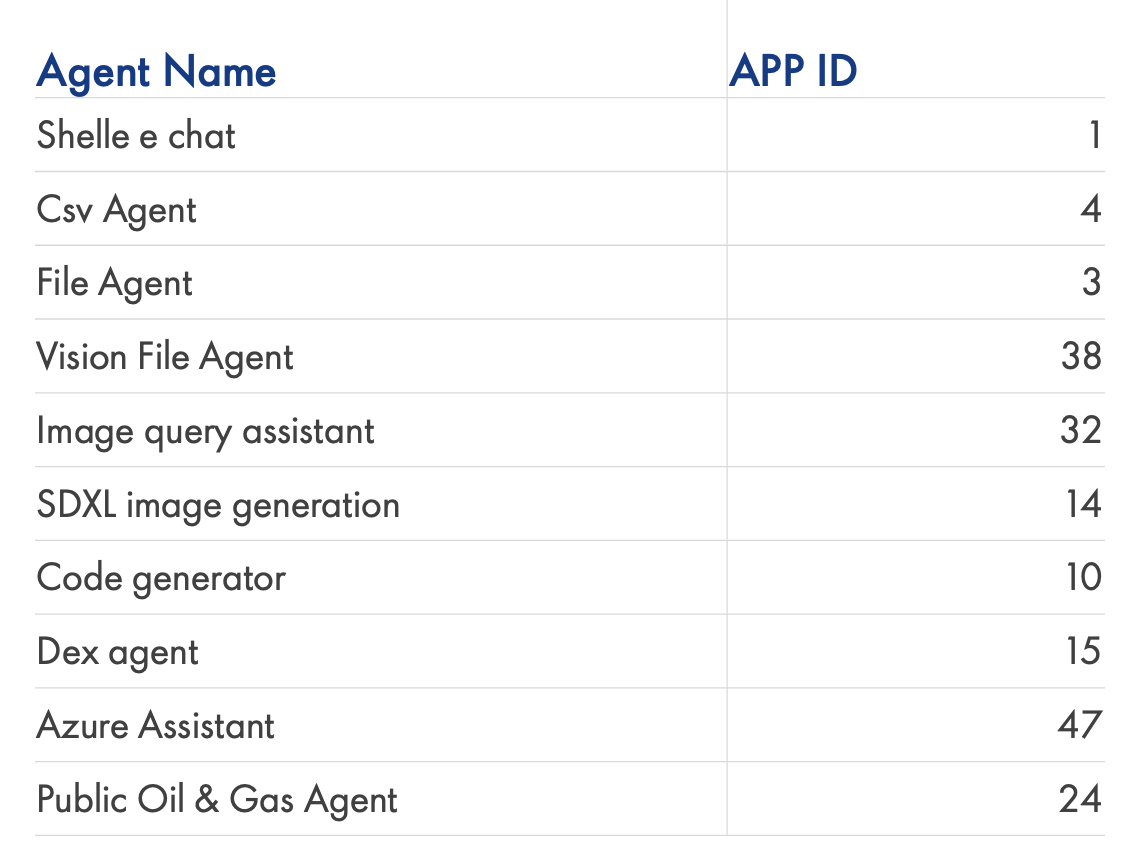

# Test Vision File Agent to see if Shelle can analyze the well log curves

In [ ]:
from pyshelle import ShelleClient
import time
import os

APPLICATION_ID = 32
from dotenv import load_dotenv
load_dotenv()
CLIENT_ID = app_id
CLIENT_PASS = client_pass
CLIENT_SECRET = client_secret
SUBSCRIPTION_KEY = subscription_key
ENDPOINT = 'https://nprd-sbtst-shelleapimgmt.azure-api.net/backend'

client = ShelleClient(APPLICATION_ID, 
                      CLIENT_ID,
                      CLIENT_PASS, 
                      CLIENT_SECRET,
                      subscription_key=SUBSCRIPTION_KEY,                                                         
                      endpoint=ENDPOINT) 

file_name = "temp\\well_curves.png"     
input_dir = "C:\\Users\\Chuen-Song.Chen\\Log-nificent-Minds" #".\\" #"C:\\Users\\user\\Desktop\\shelle\\input"
response = client.upload_file(file_=os.path.join(input_dir, file_name))     
if not response.error:         
    print(response.message)
overrides = {
        "prompt": "Answer every questions with a joke in the end",
        "temperature": 0.3,
        "top_p": 0.7
}


response = client.get_response(prompt='Could you analyze thercurves and tell me about abnormaly and correlation?',
                               overrides=overrides)     

client.new_conversation()

if not response.error:         
    print(response.message)
     

None
Sure, let's analyze the curves in the provided image.

### Analysis of Curves

#### Left Graph (GR)
- **GR** stands for Gamma Ray log, which is used in geological logging to measure the natural radioactivity of the formation.
- The curve shows a significant increase in gamma ray readings at a certain depth, indicating a change in the lithology, possibly from a cleaner formation (like sandstone) to a more shaly formation.

#### Right Graph (NEU)
- **NEU** stands for Neutron Porosity log, which measures the hydrogen content in the formation and is used to infer porosity.
- The curve shows a decrease in neutron porosity readings at a similar depth where the GR log shows an increase. This suggests that the formation has less hydrogen content, which could be due to a change from a porous rock to a less porous one.

### Abnormalities
- The significant increase in the GR log indicates an abnormality in the formation, suggesting a transition to a more shaly or clay-rich zone.
- The corres

In [ ]:
from pyshelle import ShelleClient
import time
import os

APPLICATION_ID = 32


CLIENT_ID = app_id
CLIENT_PASS = client_pass
CLIENT_SECRET = client_secret
SUBSCRIPTION_KEY = subscription_key
ENDPOINT = 'https://nprd-sbtst-shelleapimgmt.azure-api.net/backend'

client = ShelleClient(APPLICATION_ID, 
                      CLIENT_ID,
                      CLIENT_PASS, 
                      CLIENT_SECRET,
                      subscription_key=SUBSCRIPTION_KEY,                                                         
                      endpoint=ENDPOINT) 

file_name = "temp\\well_curves.png"     
input_dir = "C:\\Users\\Chuen-Song.Chen\\Log-nificent-Minds" #".\\" #"C:\\Users\\user\\Desktop\\shelle\\input"
response = client.upload_file(file_=os.path.join(input_dir, file_name))     
if not response.error:         
    print(response.message)
overrides = {
        "prompt": "Answer every questions with a joke in the end",
        "temperature": 0.3,
        "top_p": 0.7
}


response = client.get_response(prompt='Identify potential pay zones using log interpretation?',
                               overrides=overrides)     

client.new_conversation()

if not response.error:         
    print(response.message)
     

None
To identify potential pay zones using log interpretation, we typically look for zones with favorable reservoir properties such as low gamma ray (GR) readings indicating clean (non-shaly) formations and high neutron porosity (NEU) readings indicating the presence of hydrocarbons. 

In the provided image:

1. **Gamma Ray (GR) Log (Left Plot):**
   - Low GR values generally indicate cleaner formations, which are more likely to be reservoirs.
   - In the left plot, look for sections where the GR log shows a significant drop or stays consistently low.

2. **Neutron Porosity (NEU) Log (Right Plot):**
   - High NEU values can indicate the presence of hydrocarbons, especially when compared to other logs like density or resistivity.
   - In the right plot, look for sections where the NEU log shows higher values.

### Potential Pay Zones:
- **Depth Range 1:**
  - **GR Log:** Around 0.8 to 1.0 on the vertical axis, the GR values are low.
  - **NEU Log:** Corresponding to the same depth range

In [ ]:
from pyshelle import ShelleClient
import time
import os

APPLICATION_ID = 32
CLIENT_ID = app_id
CLIENT_PASS = client_pass
CLIENT_SECRET = client_secret
SUBSCRIPTION_KEY = subscription_key
ENDPOINT = 'https://nprd-sbtst-shelleapimgmt.azure-api.net/backend'

client = ShelleClient(APPLICATION_ID, 
                      CLIENT_ID,
                      CLIENT_PASS, 
                      CLIENT_SECRET,
                      subscription_key=SUBSCRIPTION_KEY,                                                         
                      endpoint=ENDPOINT) 

file_name = "temp\\well_curves3.png"     
input_dir = "C:\\Users\\Chuen-Song.Chen\\Log-nificent-Minds" #".\\" #"C:\\Users\\user\\Desktop\\shelle\\input"
response = client.upload_file(file_=os.path.join(input_dir, file_name))     
if not response.error:         
    print(response.message)
overrides = {
        "prompt": "Answer every questions with a joke in the end",
        "temperature": 0.3,
        "top_p": 0.7
}


response = client.get_response(prompt='Y axis is the depth, and X axis is the GR or RES-DEP. Depth is from 5000 to 3000. Identify reservoir with low GR and high RES-DEP? and how thick is the zone with low GR and high RES-DEP?',
                               overrides=overrides)     

client.new_conversation()

if not response.error:         
    print(response.message)
     

None
To identify the reservoir with low GR (Gamma Ray) and high RES-DEP (Resistivity), we need to look for the depth intervals where the GR values are low and the RES-DEP values are high.

1. **Identifying the Reservoir:**
   - In the left plot (GR), low GR values are observed approximately between the depths of 3500 and 3700.
   - In the right plot (RES-DEP), high RES-DEP values are also observed approximately between the depths of 3500 and 3700.

2. **Thickness of the Zone:**
   - The zone with low GR and high RES-DEP is between 3500 and 3700.
   - Therefore, the thickness of this zone is \( 3700 - 3500 = 200 \) units.

So, the reservoir is located between the depths of 3500 and 3700, and the thickness of this zone is 200 units.

Why did the geologist bring a ladder to the well site? Because they wanted to reach new depths in their research!


In [ ]:
from pyshelle import ShelleClient
import time
import os

APPLICATION_ID = 32
CLIENT_ID = app_id
CLIENT_PASS = client_pass
CLIENT_SECRET = client_secret
SUBSCRIPTION_KEY = subscription_key
ENDPOINT = 'https://nprd-sbtst-shelleapimgmt.azure-api.net/backend'

client = ShelleClient(APPLICATION_ID, 
                      CLIENT_ID,
                      CLIENT_PASS, 
                      CLIENT_SECRET,
                      subscription_key=SUBSCRIPTION_KEY,                                                         
                      endpoint=ENDPOINT) 

file_name = "temp\\well_curves3.png"     
input_dir = "C:\\Users\\Chuen-Song.Chen\\Log-nificent-Minds" #".\\" #"C:\\Users\\user\\Desktop\\shelle\\input"
response = client.upload_file(file_=os.path.join(input_dir, file_name))     
if not response.error:         
    print(response.message)
overrides = {
        "prompt": "Answer every questions with a joke in the end",
        "temperature": 0.3,
        "top_p": 0.7
}


response = client.get_response(prompt='Y axis is the depth, and X axis is the GR or RES-DEP. Identify reservoir with low GR and high RES-DEP? and how thick is the zone with low GR and high RES-DEP?',
                               overrides=overrides)     

client.new_conversation()

if not response.error:         
    print(response.message)

None
To identify the reservoir with low Gamma Ray (GR) and high Resistivity (RES_DEP), we need to look for the zones where the GR values are low and the RES_DEP values are high. 

From the provided plots:
- The left plot shows the GR log.
- The right plot shows the RES_DEP log.

### Identifying the Reservoir:
1. **Low GR Zone**: 
   - The GR log shows low values approximately between the depths of 1500 and 1600 units.

2. **High RES_DEP Zone**:
   - The RES_DEP log shows high values approximately between the depths of 1500 and 1600 units.

### Thickness of the Zone:
The reservoir zone with low GR and high RES_DEP is approximately between 1500 and 1600 units of depth. Therefore, the thickness of this zone is:
\[ 1600 - 1500 = 100 \text{ units} \]

So, the reservoir with low GR and high RES_DEP is located between 1500 and 1600 units of depth, and the thickness of this zone is 100 units.

Why did the geologist bring a ladder to the well site? Because they heard the reservoir was at a "hig